# Credit Default Swaps

https://en.wikipedia.org/wiki/Credit_default_swap

[*********************100%%**********************]  1 of 1 completed


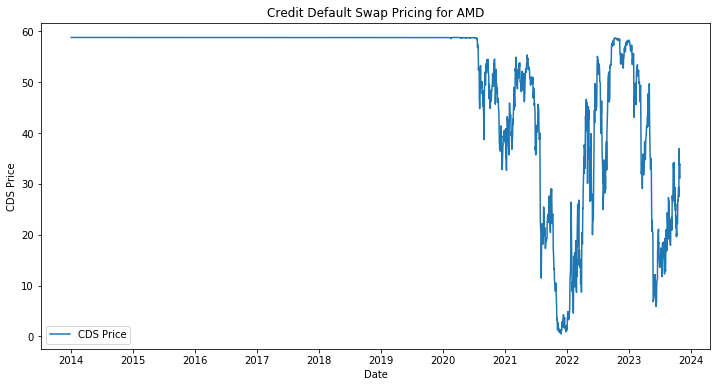

In [1]:
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the CDS pricing function
def calculate_cds_pricing(stock_price, strike_price, risk_free_rate, time_to_maturity, volatility, recovery_rate):
    # Calculate the d1 and d2 parameters
    d1 = (np.log(stock_price / strike_price) + (risk_free_rate + (volatility ** 2) / 2) * time_to_maturity) / (volatility * np.sqrt(time_to_maturity))
    d2 = d1 - volatility * np.sqrt(time_to_maturity)
    
    # Calculate the Black-Scholes CDS value
    cds_value = strike_price * np.exp(-risk_free_rate * time_to_maturity) * (1 - recovery_rate) * norm.cdf(-d2)
    
    return cds_value

# Input for the CDS calculation
symbol = 'AMD'
start = '2014-01-01'
end = '2023-11-01'

# Read stock price data
dataset = yf.download(symbol, start, end)

# Define CDS parameters
strike_price = 100  # Face value of the bond
risk_free_rate = 0.02  # Risk-free interest rate
time_to_maturity = 1.0  # Time to maturity in years
volatility = 0.2  # Stock price volatility
recovery_rate = 0.4  # Recovery rate in case of default

# Calculate CDS pricing and create a new column in the dataset
dataset['CDS_Price'] = calculate_cds_pricing(dataset['Adj Close'], strike_price, risk_free_rate, time_to_maturity, volatility, recovery_rate)

# Plot the CDS pricing
plt.figure(figsize=(12, 6))
plt.plot(dataset.index, dataset['CDS_Price'], label='CDS Price')
plt.xlabel('Date')
plt.ylabel('CDS Price')
plt.title('Credit Default Swap Pricing for {}'.format(symbol))
plt.legend()
plt.show()